# Professions: comparison (new g_diff)

In the following notebook we're going to compare all the approaches we developed and test them on a small amount of professions for which we have precise statics about. We will use both FastText's and Gonen's embeddings.

In [6]:
# general
import pandas as pd
import numpy as np
import scipy.stats
import codecs
from matplotlib import pyplot as plt
from numpy import linalg as LA

# bolukbasi's
import debiaswe as dwe
import debiaswe.we as we
from debiaswe.we import WordEmbedding

# mine
import db_functions as db

### Step 1: Load embeddings

We load all the emdeddings using the same methods and applying the same preprocessing in order to have a common start.

In [7]:
# load FastText's emdeddings
E_ft =  WordEmbedding('../embedding/fast-text/cc.it.300.reduced.vec', 'ft')

*** Reading data from ../embedding/fast-text/cc.it.300.reduced.vec
(485, 300)
485 words of dimension 300 : questo, sua, suo, prima, ..., supportivo, calzolaia, supportiva, agrotecnica
485 words of dimension 300 : questo, sua, suo, prima, ..., supportivo, calzolaia, supportiva, agrotecnica


### Step 2: working whit FastText's embeddings

#### Step 2.1: vector difference

In [8]:
# gender direction
g_diff_0 = E_ft.diff('lui', 'lei')
g_diff_1 = E_ft.diff('uomo', 'donna')
g_diff_2 = E_ft.diff('padre', 'madre')
g_diff_3 = E_ft.diff('marito', 'moglie')
g_diff_4 = E_ft.diff('fratello', 'sorella')
g_diff_5 = E_ft.diff('maschio', 'femmina')

#### Step 2.2: PCA

In [4]:
# list of pairs to define gender
'''
gender_pairs = [['lei','lui'],
                ['donna','uomo'], 
                ['madre','padre'],
                ['moglie','marito'],
                ['sorella','fratello'],
                ['femmina','maschio']]
'''

gender_pairs = [['lui','lei'],
                ['uomo','donna'], 
                ['padre','madre'],
                ['marito','moglie'],
                ['fratello','sorella'],
                ['maschio','femmina']]

In [5]:
# PCA
pca = we.doPCA(gender_pairs, E_ft)

# PCA components
pc = pca.components_

# singular values
sv = pca.singular_values_

In [6]:
print("Singular values:")
print(sv)

Singular values:
[9.5309240e-01 5.3566736e-01 3.7772956e-01 3.4538972e-01 2.9901835e-01
 2.4023318e-01 5.8411594e-08 4.6098762e-08 4.3273410e-08 4.1712632e-08]


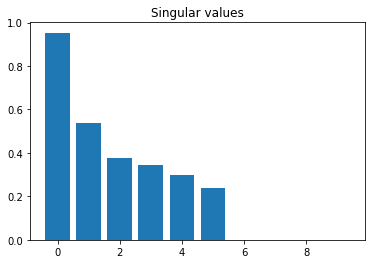

In [7]:
plt.bar(range(pca.n_components_), sv)
plt.title("Singular values")
plt.show()

In [8]:
# gender direction
g_pca_0  = pc[0]/LA.norm(pc[0])

#### Step 2.4: compute projections

##### Ungendered professions

In [9]:
# read professions
prof_ung_truth = db.read('professions_ung.csv', 'truth')

In [10]:
# compute projection of each profession on g_diff
proj_ung_g_diff_0 = db.prof_proj(E_ft, prof_ung_truth, g_diff_0, 'istat')
proj_ung_g_diff_1 = db.prof_proj(E_ft, prof_ung_truth, g_diff_1, 'istat')
proj_ung_g_diff_2 = db.prof_proj(E_ft, prof_ung_truth, g_diff_2, 'istat')
proj_ung_g_diff_3 = db.prof_proj(E_ft, prof_ung_truth, g_diff_3, 'istat')
proj_ung_g_diff_4 = db.prof_proj(E_ft, prof_ung_truth, g_diff_4, 'istat')
proj_ung_g_diff_5 = db.prof_proj(E_ft, prof_ung_truth, g_diff_5, 'istat')

# compute projection of each profession on g_pca_0
proj_ung_g_pca_0 = db.prof_proj(E_ft, prof_ung_truth, g_pca_0, 'istat')

In [11]:
# print results
ung_col0 = [] # pandas columns
ung_col1 = []
ung_col2 = []
ung_col3 = []
ung_col4 = []
ung_col5 = []
ung_col6 = []
ung_col7 = []
ung_col8 = []
ung_col9 = []

for i in range(len(proj_ung_g_diff_0)):
    ung_col0.append(proj_ung_g_diff_0[i][0]) # profession
    ung_col1.append(proj_ung_g_diff_0[i][1]) # projection on g_diff
    ung_col2.append(proj_ung_g_diff_1[i][1]) # projection on g_diff
    ung_col3.append(proj_ung_g_diff_2[i][1]) # projection on g_diff
    ung_col4.append(proj_ung_g_diff_3[i][1]) # projection on g_diff
    ung_col5.append(proj_ung_g_diff_4[i][1]) # projection on g_diff
    ung_col6.append(proj_ung_g_diff_5[i][1]) # projection on g_diff    
    ung_col7.append(proj_ung_g_pca_0[i][1]) # projection on g_pca_0
    ung_col8.append(proj_ung_g_diff_0[i][2]) # %male
    ung_col9.append(proj_ung_g_diff_0[i][3]) # %female

    
ung_data = {'Profession':ung_col0, 
           'g_diff_0':ung_col1,
           'g_diff_1':ung_col2,
           'g_diff_2':ung_col3,
           'g_diff_3':ung_col4,
           'g_diff_4':ung_col5,
           'g_diff_5':ung_col6,
           'g_pca_0':ung_col7, 
           '% male':ung_col8, 
           '% female':ung_col9}
ung_table = pd.DataFrame(ung_data)
ung_table

,Profession,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,% male,% female
0,camionista,0.027856,0.006817,0.158233,0.088605,0.091831,0.090440,0.102896,96.9,3.1
1,elettricista,0.073085,0.117849,0.105483,0.068620,0.110183,0.042612,0.122825,96.8,3.2
2,ingegnere,0.043748,0.175331,0.257055,0.095855,0.172337,0.166725,0.217653,83.6,16.4
3,architetto,0.076696,0.170374,0.194725,0.057209,0.132980,0.139441,0.183021,64.7,35.3
4,notaio,0.082010,0.032398,0.232911,0.106469,0.163138,0.155390,0.171843,66.4,33.6
5,commercialista,0.024475,0.027076,0.176165,0.090656,0.104236,0.065388,0.113249,68.2,31.8
6,giornalista,-0.048235,-0.023722,0.138492,0.044433,0.065857,0.011699,0.050688,54.7,45.3
7,insegnante,-0.103818,-0.024392,-0.014566,-0.032816,-0.080169,-0.006266,-0.055340,17.3,82.7
8,barista,0.027839,-0.027295,0.088853,0.051669,0.044416,0.072014,0.052001,38.9,61.1
9,medico,-0.004724,0.012710,0.176087,0.167472,0.108526,0.185667,0.135863,56.3,43.7


In [12]:
# pearson correlation
r_g_diff_0 = scipy.stats.pearsonr(ung_col9, ung_col1)[0]
r_g_diff_1 = scipy.stats.pearsonr(ung_col9, ung_col2)[0]
r_g_diff_2 = scipy.stats.pearsonr(ung_col9, ung_col3)[0]
r_g_diff_3 = scipy.stats.pearsonr(ung_col9, ung_col4)[0]
r_g_diff_4 = scipy.stats.pearsonr(ung_col9, ung_col5)[0]
r_g_diff_5 = scipy.stats.pearsonr(ung_col9, ung_col6)[0]
r_g_pca_0 = scipy.stats.pearsonr(ung_col9, ung_col7)[0]

p_g_diff_0 = scipy.stats.pearsonr(ung_col9, ung_col1)[1]
p_g_diff_1 = scipy.stats.pearsonr(ung_col9, ung_col2)[1]
p_g_diff_2 = scipy.stats.pearsonr(ung_col9, ung_col3)[1]
p_g_diff_3 = scipy.stats.pearsonr(ung_col9, ung_col4)[1]
p_g_diff_4 = scipy.stats.pearsonr(ung_col9, ung_col5)[1]
p_g_diff_5 = scipy.stats.pearsonr(ung_col9, ung_col6)[1]
p_g_pca_0 = scipy.stats.pearsonr(ung_col9, ung_col7)[1]

In [13]:
pearson_data = {'g_diff_0':[r_g_diff_0,p_g_diff_0],
                'g_diff_1':[r_g_diff_1,p_g_diff_1],
                'g_diff_2':[r_g_diff_2,p_g_diff_2],
                'g_diff_3':[r_g_diff_3,p_g_diff_3],
                'g_diff_4':[r_g_diff_4,p_g_diff_4],
                'g_diff_5':[r_g_diff_5,p_g_diff_5],
                'g_pca_0':[r_g_pca_0,p_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
pearson_table

,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,-0.810652,-0.710500,-0.750528,-0.600384,-0.815826,-0.562276,-0.79832
p,0.000140,0.002038,0.000809,0.013930,0.000117,0.023383,0.00021


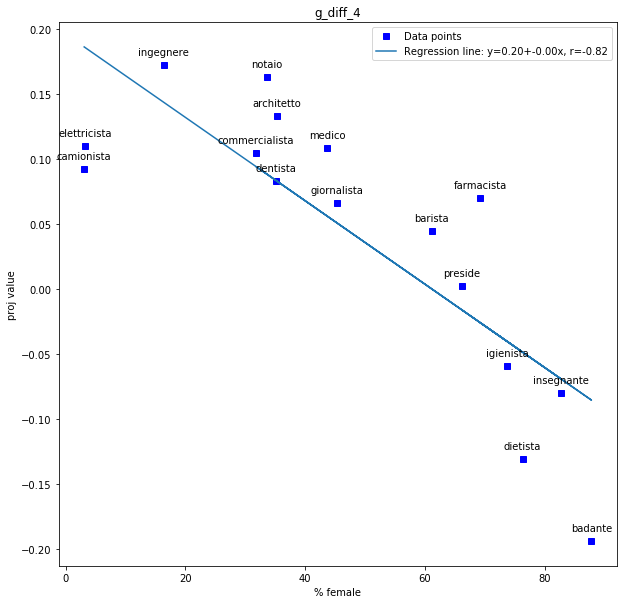

In [14]:
# correlation plot g_diff_4
slope, intercept, r, p, stderr = scipy.stats.linregress(ung_col9, ung_col5)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ung_col9, ung_col5, linewidth=0, marker='s', color='blue', label='Data points')
ax.plot(np.array(ung_col9), intercept + slope * np.array(ung_col9), label=line)
ax.set_xlabel('% female')
ax.set_ylabel('proj value')
ax.set_title("g_diff_4")
ax.legend(facecolor='white')

for i, label in enumerate(ung_col0):
    plt.annotate(label, # this is the text
                 (ung_col9[i], ung_col5[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('plot/ung/correlation/ft_g_diff')

##### Gendered professions

In [14]:
# read professions
prof_gen_truth = db.read('professions_gen.csv', 'truth-mf')

In [15]:
# compute projection of each profession on g_diff
proj_gen_g_diff_0 = db.prof_proj(E_ft, prof_gen_truth, g_diff_0, 'istat-mf')
proj_gen_g_diff_1 = db.prof_proj(E_ft, prof_gen_truth, g_diff_1, 'istat-mf')
proj_gen_g_diff_2 = db.prof_proj(E_ft, prof_gen_truth, g_diff_2, 'istat-mf')
proj_gen_g_diff_3 = db.prof_proj(E_ft, prof_gen_truth, g_diff_3, 'istat-mf')
proj_gen_g_diff_4 = db.prof_proj(E_ft, prof_gen_truth, g_diff_4, 'istat-mf')
proj_gen_g_diff_5 = db.prof_proj(E_ft, prof_gen_truth, g_diff_5, 'istat-mf')

# compute projection of each profession on g_pca_0
proj_gen_g_pca_0 = db.prof_proj(E_ft, prof_gen_truth, g_pca_0, 'istat-mf')

In [16]:
# print results
gen_col0 = [] # pandas columns
gen_col1 = []
gen_col2 = []
gen_col3 = []
gen_col4 = []
gen_col5 = []
gen_col6 = []
gen_col7 = []
gen_col8 = []

for i in range(len(proj_gen_g_diff_0)):
    gen_col0.append(proj_gen_g_diff_0[i][0]) # profession
    gen_col1.append(proj_gen_g_diff_0[i][1]) # projection on g_diff
    gen_col2.append(proj_gen_g_diff_1[i][1]) # projection on g_diff
    gen_col3.append(proj_gen_g_diff_2[i][1]) # projection on g_diff
    gen_col4.append(proj_gen_g_diff_3[i][1]) # projection on g_diff
    gen_col5.append(proj_gen_g_diff_4[i][1]) # projection on g_diff
    gen_col6.append(proj_gen_g_diff_5[i][1]) # projection on g_diff    
    gen_col7.append(proj_gen_g_pca_0[i][1]) # projection on g_pca_0
    gen_col8.append(proj_gen_g_diff_0[i][4]) # %female

    
gen_data = {'Male profession':gen_col0, 
           'g_diff_0':gen_col1,
           'g_diff_1':gen_col2,
           'g_diff_2':gen_col3,
           'g_diff_3':gen_col4,
           'g_diff_4':gen_col5,
           'g_diff_5':gen_col6,
           'g_pca_0':gen_col7, 
           '% female':gen_col8}
gen_table = pd.DataFrame(gen_data)
gen_table

,Male profession,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,% female
0,calzolaio,0.106336,0.045582,0.177801,0.098268,0.151477,0.128752,0.155676,8.0
1,biologo,0.066985,0.183290,0.235587,0.135213,0.213579,0.131276,0.229635,76.0
2,avvocato,-0.053588,0.082862,0.180010,0.113123,0.131680,0.083988,0.132720,47.2
3,psicologo,0.068424,0.084388,0.190728,0.114282,0.135595,0.169098,0.169177,82.9
4,maestro,0.201372,0.192769,0.334151,0.140379,0.302011,0.178979,0.312891,96.4
5,professore,-0.029616,0.141050,0.285533,0.143506,0.216453,0.198132,0.228402,71.9
6,cameriere,0.046219,-0.000482,0.126397,0.072499,0.088143,0.134340,0.097974,51.4
7,albergatore,0.081593,0.118021,0.120198,0.001524,0.100999,0.141934,0.130638,50.6
8,infermiere,-0.044242,-0.019978,0.019220,0.011836,-0.018544,0.117574,0.007298,77.0
9,geologo,0.035964,0.102046,0.251608,0.116764,0.191465,0.071791,0.187185,39.8


In [17]:
# print results
gen_col0 = [] # pandas columns
gen_col1 = []
gen_col2 = []
gen_col3 = []
gen_col4 = []
gen_col5 = []
gen_col6 = []
gen_col7 = []
gen_col8 = []

for i in range(len(proj_gen_g_diff_0)):
    gen_col0.append(proj_gen_g_diff_0[i][2]) # profession
    gen_col1.append(proj_gen_g_diff_0[i][3]) # projection on g_diff
    gen_col2.append(proj_gen_g_diff_1[i][3]) # projection on g_diff
    gen_col3.append(proj_gen_g_diff_2[i][3]) # projection on g_diff
    gen_col4.append(proj_gen_g_diff_3[i][3]) # projection on g_diff
    gen_col5.append(proj_gen_g_diff_4[i][3]) # projection on g_diff
    gen_col6.append(proj_gen_g_diff_5[i][3]) # projection on g_diff    
    gen_col7.append(proj_gen_g_pca_0[i][3]) # projection on g_pca_0
    gen_col8.append(proj_gen_g_diff_0[i][4]) # %female

    
gen_data = {'Female profession':gen_col0, 
           'g_diff_0':gen_col1,
           'g_diff_1':gen_col2,
           'g_diff_2':gen_col3,
           'g_diff_3':gen_col4,
           'g_diff_4':gen_col5,
           'g_diff_5':gen_col6,
           'g_pca_0':gen_col7, 
           '% female':gen_col8}
gen_table = pd.DataFrame(gen_data)
gen_table

,Female profession,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,% female
0,calzolaia,-0.083221,-0.195199,-0.131570,-0.117376,-0.215863,-0.216645,-0.217826,8.0
1,biologa,-0.263955,-0.206549,-0.186032,-0.092875,-0.273790,-0.191632,-0.272445,76.0
2,avvocatessa,-0.291315,-0.244512,-0.192052,-0.095376,-0.247557,-0.194674,-0.283173,47.2
3,psicologa,-0.238524,-0.302711,-0.190425,-0.104976,-0.299172,-0.172067,-0.304119,82.9
4,maestra,-0.244963,-0.271345,-0.190685,-0.112551,-0.302970,-0.191202,-0.301025,96.4
5,professoressa,-0.323749,-0.276935,-0.141452,-0.131447,-0.293481,-0.133323,-0.292575,71.9
6,cameriera,-0.189663,-0.283654,-0.158992,-0.093564,-0.245317,-0.134555,-0.259899,51.4
7,albergatrice,-0.200101,-0.178817,-0.204213,-0.147025,-0.288127,-0.212061,-0.274839,50.6
8,infermiera,-0.253701,-0.241065,-0.171730,-0.061935,-0.260352,-0.116140,-0.257126,77.0
9,geologa,-0.277250,-0.216451,-0.154224,-0.117872,-0.270769,-0.237270,-0.278603,39.8


##### Ungendered + mean gendered professions

In [18]:
# print results
mean_col0 = [] # pandas columns
mean_col1 = []
mean_col2 = []
mean_col3 = []
mean_col4 = []
mean_col5 = []
mean_col6 = []
mean_col7 = []
mean_col8 = []
mean_col9 = []

for i in range(len(proj_ung_g_diff_0)):
    mean_col0.append(proj_ung_g_diff_0[i][0]) # profession
    mean_col1.append(proj_ung_g_diff_0[i][1]) # projection on g_diff
    mean_col2.append(proj_ung_g_diff_1[i][1]) # projection on g_diff
    mean_col3.append(proj_ung_g_diff_2[i][1]) # projection on g_diff
    mean_col4.append(proj_ung_g_diff_3[i][1]) # projection on g_diff
    mean_col5.append(proj_ung_g_diff_4[i][1]) # projection on g_diff
    mean_col6.append(proj_ung_g_diff_5[i][1]) # projection on g_diff    
    mean_col7.append(proj_ung_g_pca_0[i][1]) # projection on g_pca_0
    mean_col8.append(proj_ung_g_diff_0[i][3]) # %female

for i in range(len(proj_gen_g_diff_0)):
    mean_col0.append(proj_gen_g_diff_0[i][0]) # profession
    mean_col1.append((proj_gen_g_diff_0[i][1]+proj_gen_g_diff_0[i][3])/2) # projection on g_diff
    mean_col2.append((proj_gen_g_diff_1[i][1]+proj_gen_g_diff_1[i][3])/2) # projection on g_diff
    mean_col3.append((proj_gen_g_diff_2[i][1]+proj_gen_g_diff_2[i][3])/2) # projection on g_diff
    mean_col4.append((proj_gen_g_diff_3[i][1]+proj_gen_g_diff_3[i][3])/2) # projection on g_diff
    mean_col5.append((proj_gen_g_diff_4[i][1]+proj_gen_g_diff_4[i][3])/2) # projection on g_diff
    mean_col6.append((proj_gen_g_diff_5[i][1]+proj_gen_g_diff_5[i][3])/2) # projection on g_diff    
    mean_col7.append((proj_gen_g_pca_0[i][1]+proj_gen_g_pca_0[i][3])/2) # projection on g_pca_0
    mean_col8.append(proj_gen_g_diff_0[i][4]) # %female

    
mean_data = {'Profession':mean_col0, 
           'g_diff_0':mean_col1,
           'g_diff_1':mean_col2,
           'g_diff_2':mean_col3,
           'g_diff_3':mean_col4,
           'g_diff_4':mean_col5,
           'g_diff_5':mean_col6,
           'g_pca_0':mean_col7,  
           '% female':mean_col8}
mean_table = pd.DataFrame(mean_data)
mean_table

,Profession,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,% female
0,camionista,0.027856,0.006817,0.158233,0.088605,0.091831,0.090440,0.102896,3.1
1,elettricista,0.073085,0.117849,0.105483,0.068620,0.110183,0.042612,0.122825,3.2
2,ingegnere,0.043748,0.175331,0.257055,0.095855,0.172337,0.166725,0.217653,16.4
3,architetto,0.076696,0.170374,0.194725,0.057209,0.132980,0.139441,0.183021,35.3
4,notaio,0.082010,0.032398,0.232911,0.106469,0.163138,0.155390,0.171843,33.6
5,commercialista,0.024475,0.027076,0.176165,0.090656,0.104236,0.065388,0.113249,31.8
6,giornalista,-0.048235,-0.023722,0.138492,0.044433,0.065857,0.011699,0.050688,45.3
7,insegnante,-0.103818,-0.024392,-0.014566,-0.032816,-0.080169,-0.006266,-0.055340,82.7
8,barista,0.027839,-0.027295,0.088853,0.051669,0.044416,0.072014,0.052001,61.1
9,medico,-0.004724,0.012710,0.176087,0.167472,0.108526,0.185667,0.135863,43.7


In [19]:
# pearson correlation
r_g_diff_0 = scipy.stats.pearsonr(mean_col8, mean_col1)[0]
r_g_diff_1 = scipy.stats.pearsonr(mean_col8, mean_col2)[0]
r_g_diff_2 = scipy.stats.pearsonr(mean_col8, mean_col3)[0]
r_g_diff_3 = scipy.stats.pearsonr(mean_col8, mean_col4)[0]
r_g_diff_4 = scipy.stats.pearsonr(mean_col8, mean_col5)[0]
r_g_diff_5 = scipy.stats.pearsonr(mean_col8, mean_col6)[0]
r_g_pca_0 = scipy.stats.pearsonr(mean_col8, mean_col7)[0]

p_g_diff_0 = scipy.stats.pearsonr(mean_col8, mean_col1)[1]
p_g_diff_1 = scipy.stats.pearsonr(mean_col8, mean_col2)[1]
p_g_diff_2 = scipy.stats.pearsonr(mean_col8, mean_col3)[1]
p_g_diff_3 = scipy.stats.pearsonr(mean_col8, mean_col4)[1]
p_g_diff_4 = scipy.stats.pearsonr(mean_col8, mean_col5)[1]
p_g_diff_5 = scipy.stats.pearsonr(mean_col8, mean_col6)[1]
p_g_pca_0 = scipy.stats.pearsonr(mean_col8, mean_col7)[1]

In [20]:
pearson_data = {'g_diff_0':[r_g_diff_0,p_g_diff_0],
                'g_diff_1':[r_g_diff_1,p_g_diff_1],
                'g_diff_2':[r_g_diff_2,p_g_diff_2],
                'g_diff_3':[r_g_diff_3,p_g_diff_3],
                'g_diff_4':[r_g_diff_4,p_g_diff_4],
                'g_diff_5':[r_g_diff_5,p_g_diff_5],
                'g_pca_0':[r_g_pca_0,p_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
pearson_table

,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,-0.663815,-0.593917,-0.575332,-0.401057,-0.658386,-0.358230,-0.633884
p,0.000047,0.000428,0.000709,0.025349,0.000057,0.047838,0.000129


### Step 3: wikipedia embeddings

In [2]:
# load FastText's emdeddings
E_ft =  WordEmbedding('../embedding/fast-text/wiki.it.reduced.vec', 'ft')

*** Reading data from ../embedding/fast-text/wiki.it.reduced.vec
(476, 300)
476 words of dimension 300 : sua, suo, prima, italiano, ..., credulona, calzolaia, supportivo, agrotecnica
476 words of dimension 300 : sua, suo, prima, italiano, ..., credulona, calzolaia, supportivo, agrotecnica


#### Step 2.1: vector difference

In [3]:
# gender direction
g_diff_0 = E_ft.diff('lui', 'lei')
g_diff_1 = E_ft.diff('uomo', 'donna')
g_diff_2 = E_ft.diff('padre', 'madre')
g_diff_3 = E_ft.diff('marito', 'moglie')
g_diff_4 = E_ft.diff('fratello', 'sorella')
g_diff_5 = E_ft.diff('maschio', 'femmina')

#### Step 2.2: PCA

In [4]:
# list of pairs to define gender
'''
gender_pairs = [['lei','lui'],
                ['donna','uomo'], 
                ['madre','padre'],
                ['moglie','marito'],
                ['sorella','fratello'],
                ['femmina','maschio']]
'''

gender_pairs = [['lui','lei'],
                ['uomo','donna'], 
                ['padre','madre'],
                ['marito','moglie'],
                ['fratello','sorella'],
                ['maschio','femmina']]

In [5]:
# PCA
pca = we.doPCA(gender_pairs, E_ft)

# PCA components
pc = pca.components_

# singular values
sv = pca.singular_values_

In [6]:
print("Singular values:")
print(sv)

Singular values:
[7.9063672e-01 4.8787877e-01 3.9824027e-01 3.5311949e-01 3.3102319e-01
 2.5868079e-01 7.1079853e-08 5.8829958e-08 5.3196310e-08 4.3196874e-08]


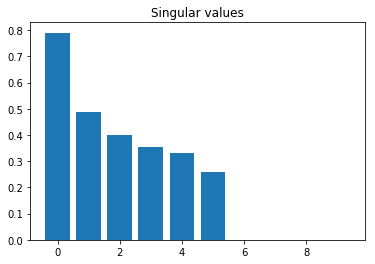

In [7]:
plt.bar(range(pca.n_components_), sv)
plt.title("Singular values")
plt.show()

In [8]:
# gender direction
g_pca_0  = pc[0]/LA.norm(pc[0])

#### Step 2.4: compute projections

##### Ungendered professions

In [9]:
# read professions
prof_ung_truth = db.read('professions_ung.csv', 'truth')

In [10]:
# compute projection of each profession on g_diff
proj_ung_g_diff_0 = db.prof_proj(E_ft, prof_ung_truth, g_diff_0, 'istat')
proj_ung_g_diff_1 = db.prof_proj(E_ft, prof_ung_truth, g_diff_1, 'istat')
proj_ung_g_diff_2 = db.prof_proj(E_ft, prof_ung_truth, g_diff_2, 'istat')
proj_ung_g_diff_3 = db.prof_proj(E_ft, prof_ung_truth, g_diff_3, 'istat')
proj_ung_g_diff_4 = db.prof_proj(E_ft, prof_ung_truth, g_diff_4, 'istat')
proj_ung_g_diff_5 = db.prof_proj(E_ft, prof_ung_truth, g_diff_5, 'istat')

# compute projection of each profession on g_pca_0
proj_ung_g_pca_0 = db.prof_proj(E_ft, prof_ung_truth, g_pca_0, 'istat')

In [11]:
# print results
ung_col0 = [] # pandas columns
ung_col1 = []
ung_col2 = []
ung_col3 = []
ung_col4 = []
ung_col5 = []
ung_col6 = []
ung_col7 = []
ung_col8 = []
ung_col9 = []

for i in range(len(proj_ung_g_diff_0)):
    ung_col0.append(proj_ung_g_diff_0[i][0]) # profession
    ung_col1.append(proj_ung_g_diff_0[i][1]) # projection on g_diff
    ung_col2.append(proj_ung_g_diff_1[i][1]) # projection on g_diff
    ung_col3.append(proj_ung_g_diff_2[i][1]) # projection on g_diff
    ung_col4.append(proj_ung_g_diff_3[i][1]) # projection on g_diff
    ung_col5.append(proj_ung_g_diff_4[i][1]) # projection on g_diff
    ung_col6.append(proj_ung_g_diff_5[i][1]) # projection on g_diff    
    ung_col7.append(-proj_ung_g_pca_0[i][1]) # projection on g_pca_0
    ung_col8.append(proj_ung_g_diff_0[i][2]) # %male
    ung_col9.append(proj_ung_g_diff_0[i][3]) # %female

    
ung_data = {'Profession':ung_col0, 
           'g_diff_0':ung_col1,
           'g_diff_1':ung_col2,
           'g_diff_2':ung_col3,
           'g_diff_3':ung_col4,
           'g_diff_4':ung_col5,
           'g_diff_5':ung_col6,
           'g_pca_0':ung_col7, 
           '% male':ung_col8, 
           '% female':ung_col9}
ung_table = pd.DataFrame(ung_data)
ung_table

,Profession,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,% male,% female
0,camionista,-0.042458,-0.036899,0.127667,0.001152,0.025682,-0.012290,0.016446,96.9,3.1
1,elettricista,0.013177,-0.007607,0.139561,0.018458,0.042412,0.002347,0.051736,96.8,3.2
2,ingegnere,0.085678,0.055312,0.130477,-0.008152,0.104706,0.078890,0.117457,83.6,16.4
3,architetto,0.064599,0.075027,0.033882,-0.009113,0.079936,0.129041,0.092906,64.7,35.3
4,notaio,0.079254,-0.045446,0.167885,0.015896,0.095773,0.125410,0.082158,66.4,33.6
5,commercialista,0.004727,0.008438,0.065535,0.039781,-0.019649,-0.051778,0.014477,68.2,31.8
6,giornalista,-0.039752,-0.076597,0.070503,-0.022679,-0.043766,-0.020146,-0.040363,54.7,45.3
7,insegnante,-0.113096,-0.076575,0.085006,-0.016426,-0.089902,0.015415,-0.060914,17.3,82.7
8,barista,-0.023749,-0.058368,0.072798,0.100503,0.029448,0.017876,0.003859,38.9,61.1
9,medico,-0.005949,-0.036776,0.090542,-0.088062,0.034258,0.096253,0.021420,56.3,43.7


In [12]:
# pearson correlation
r_g_diff_0 = scipy.stats.pearsonr(ung_col9, ung_col1)[0]
r_g_diff_1 = scipy.stats.pearsonr(ung_col9, ung_col2)[0]
r_g_diff_2 = scipy.stats.pearsonr(ung_col9, ung_col3)[0]
r_g_diff_3 = scipy.stats.pearsonr(ung_col9, ung_col4)[0]
r_g_diff_4 = scipy.stats.pearsonr(ung_col9, ung_col5)[0]
r_g_diff_5 = scipy.stats.pearsonr(ung_col9, ung_col6)[0]
r_g_pca_0 = scipy.stats.pearsonr(ung_col9, ung_col7)[0]

p_g_diff_0 = scipy.stats.pearsonr(ung_col9, ung_col1)[1]
p_g_diff_1 = scipy.stats.pearsonr(ung_col9, ung_col2)[1]
p_g_diff_2 = scipy.stats.pearsonr(ung_col9, ung_col3)[1]
p_g_diff_3 = scipy.stats.pearsonr(ung_col9, ung_col4)[1]
p_g_diff_4 = scipy.stats.pearsonr(ung_col9, ung_col5)[1]
p_g_diff_5 = scipy.stats.pearsonr(ung_col9, ung_col6)[1]
p_g_pca_0 = scipy.stats.pearsonr(ung_col9, ung_col7)[1]

In [13]:
pearson_data = {'g_diff_0':[r_g_diff_0,p_g_diff_0],
                'g_diff_1':[r_g_diff_1,p_g_diff_1],
                'g_diff_2':[r_g_diff_2,p_g_diff_2],
                'g_diff_3':[r_g_diff_3,p_g_diff_3],
                'g_diff_4':[r_g_diff_4,p_g_diff_4],
                'g_diff_5':[r_g_diff_5,p_g_diff_5],
                'g_pca_0':[r_g_pca_0,p_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
pearson_table

,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,-0.568677,-0.502891,-0.549500,-0.134304,-0.678334,0.000970,-0.608877
p,0.021523,0.047089,0.027463,0.619968,0.003871,0.997155,0.012306


##### Gendered professions

In [37]:
# read professions
prof_gen_truth = db.read('professions_gen.csv', 'truth-mf')

In [38]:
# compute projection of each profession on g_diff
proj_gen_g_diff_0 = db.prof_proj(E_ft, prof_gen_truth, g_diff_0, 'istat-mf')
proj_gen_g_diff_1 = db.prof_proj(E_ft, prof_gen_truth, g_diff_1, 'istat-mf')
proj_gen_g_diff_2 = db.prof_proj(E_ft, prof_gen_truth, g_diff_2, 'istat-mf')
proj_gen_g_diff_3 = db.prof_proj(E_ft, prof_gen_truth, g_diff_3, 'istat-mf')
proj_gen_g_diff_4 = db.prof_proj(E_ft, prof_gen_truth, g_diff_4, 'istat-mf')
proj_gen_g_diff_5 = db.prof_proj(E_ft, prof_gen_truth, g_diff_5, 'istat-mf')

# compute projection of each profession on g_pca_0
proj_gen_g_pca_0 = db.prof_proj(E_ft, prof_gen_truth, g_pca_0, 'istat-mf')

In [39]:
# print results
gen_col0 = [] # pandas columns
gen_col1 = []
gen_col2 = []
gen_col3 = []
gen_col4 = []
gen_col5 = []
gen_col6 = []
gen_col7 = []
gen_col8 = []

for i in range(len(proj_gen_g_diff_0)):
    gen_col0.append(proj_gen_g_diff_0[i][0]) # profession
    gen_col1.append(proj_gen_g_diff_0[i][1]) # projection on g_diff
    gen_col2.append(proj_gen_g_diff_1[i][1]) # projection on g_diff
    gen_col3.append(proj_gen_g_diff_2[i][1]) # projection on g_diff
    gen_col4.append(proj_gen_g_diff_3[i][1]) # projection on g_diff
    gen_col5.append(proj_gen_g_diff_4[i][1]) # projection on g_diff
    gen_col6.append(proj_gen_g_diff_5[i][1]) # projection on g_diff    
    gen_col7.append(-proj_gen_g_pca_0[i][1]) # projection on g_pca_0
    gen_col8.append(proj_gen_g_diff_0[i][4]) # %female

    
gen_data = {'Male profession':gen_col0, 
           'g_diff_0':gen_col1,
           'g_diff_1':gen_col2,
           'g_diff_2':gen_col3,
           'g_diff_3':gen_col4,
           'g_diff_4':gen_col5,
           'g_diff_5':gen_col6,
           'g_pca_0':gen_col7, 
           '% female':gen_col8}
gen_table = pd.DataFrame(gen_data)
gen_table

,Male profession,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,% female
0,calzolaio,-0.023793,-0.014944,0.161277,-0.046120,0.083059,0.084341,0.063543,8.0
1,biologo,0.039189,0.052659,0.102666,-0.039755,0.078984,0.093610,0.091360,76.0
2,avvocato,-0.029861,0.038289,0.119427,-0.035460,0.050333,0.138201,0.071496,47.2
3,psicologo,0.037142,-0.051100,0.066923,-0.023827,0.038454,0.064271,0.018190,82.9
4,maestro,0.141155,0.006832,0.244477,0.006048,0.176548,0.091063,0.160697,96.4
5,professore,0.038411,0.042969,0.222620,0.014786,0.055991,0.063991,0.113210,71.9
6,cameriere,-0.122481,-0.090824,0.105868,0.044834,-0.014636,0.121473,-0.028030,51.4
7,albergatore,0.031800,0.065777,0.178780,0.026927,0.076429,0.059252,0.116741,50.6
8,infermiere,-0.096045,-0.067982,-0.067012,-0.004339,-0.137873,0.059666,-0.105445,77.0
9,geologo,0.025696,0.031681,0.163002,-0.020113,0.098114,0.062287,0.099466,39.8


In [40]:
# print results
gen_col0 = [] # pandas columns
gen_col1 = []
gen_col2 = []
gen_col3 = []
gen_col4 = []
gen_col5 = []
gen_col6 = []
gen_col7 = []
gen_col8 = []

for i in range(len(proj_gen_g_diff_0)):
    gen_col0.append(proj_gen_g_diff_0[i][2]) # profession
    gen_col1.append(proj_gen_g_diff_0[i][3]) # projection on g_diff
    gen_col2.append(proj_gen_g_diff_1[i][3]) # projection on g_diff
    gen_col3.append(proj_gen_g_diff_2[i][3]) # projection on g_diff
    gen_col4.append(proj_gen_g_diff_3[i][3]) # projection on g_diff
    gen_col5.append(proj_gen_g_diff_4[i][3]) # projection on g_diff
    gen_col6.append(proj_gen_g_diff_5[i][3]) # projection on g_diff    
    gen_col7.append(-proj_gen_g_pca_0[i][3]) # projection on g_pca_0
    gen_col8.append(proj_gen_g_diff_0[i][4]) # %female

    
gen_data = {'Female profession':gen_col0, 
           'g_diff_0':gen_col1,
           'g_diff_1':gen_col2,
           'g_diff_2':gen_col3,
           'g_diff_3':gen_col4,
           'g_diff_4':gen_col5,
           'g_diff_5':gen_col6,
           'g_pca_0':gen_col7, 
           '% female':gen_col8}
gen_table = pd.DataFrame(gen_data)
gen_table

,Female profession,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,% female
0,calzolaia,-0.012086,-0.073358,0.010846,-0.047545,-0.002124,0.023303,-0.034764,8.0
1,biologa,-0.149486,-0.167802,-0.130064,-0.147198,-0.258231,-0.119103,-0.240558,76.0
2,avvocatessa,-0.261465,-0.216900,-0.117404,-0.043961,-0.278312,-0.063729,-0.277620,47.2
3,psicologa,-0.166351,-0.296390,-0.166641,-0.123442,-0.299312,-0.105849,-0.324328,82.9
4,maestra,-0.205860,-0.213836,-0.115185,-0.016885,-0.245628,-0.110990,-0.257845,96.4
5,professoressa,-0.227354,-0.239628,-0.081677,-0.058771,-0.337642,-0.120800,-0.295522,71.9
6,cameriera,-0.340201,-0.340798,-0.142947,0.005344,-0.314262,-0.106479,-0.370641,51.4
7,albergatrice,-0.222033,-0.168124,-0.121138,-0.057556,-0.292031,-0.117945,-0.257857,50.6
8,infermiera,-0.274347,-0.224323,-0.143030,-0.068408,-0.301115,-0.080726,-0.300458,77.0
9,geologa,-0.163249,-0.173223,-0.096789,-0.156579,-0.252622,-0.099612,-0.233539,39.8


##### Ungendered + mean gendered professions

In [41]:
# print results
mean_col0 = [] # pandas columns
mean_col1 = []
mean_col2 = []
mean_col3 = []
mean_col4 = []
mean_col5 = []
mean_col6 = []
mean_col7 = []
mean_col8 = []
mean_col9 = []

for i in range(len(proj_ung_g_diff_0)):
    mean_col0.append(proj_ung_g_diff_0[i][0]) # profession
    mean_col1.append(proj_ung_g_diff_0[i][1]) # projection on g_diff
    mean_col2.append(proj_ung_g_diff_1[i][1]) # projection on g_diff
    mean_col3.append(proj_ung_g_diff_2[i][1]) # projection on g_diff
    mean_col4.append(proj_ung_g_diff_3[i][1]) # projection on g_diff
    mean_col5.append(proj_ung_g_diff_4[i][1]) # projection on g_diff
    mean_col6.append(proj_ung_g_diff_5[i][1]) # projection on g_diff    
    mean_col7.append(-proj_ung_g_pca_0[i][1]) # projection on g_pca_0
    mean_col8.append(proj_ung_g_diff_0[i][3]) # %female

for i in range(len(proj_gen_g_diff_0)):
    mean_col0.append(proj_gen_g_diff_0[i][0]) # profession
    mean_col1.append((proj_gen_g_diff_0[i][1]+proj_gen_g_diff_0[i][3])/2) # projection on g_diff
    mean_col2.append((proj_gen_g_diff_1[i][1]+proj_gen_g_diff_1[i][3])/2) # projection on g_diff
    mean_col3.append((proj_gen_g_diff_2[i][1]+proj_gen_g_diff_2[i][3])/2) # projection on g_diff
    mean_col4.append((proj_gen_g_diff_3[i][1]+proj_gen_g_diff_3[i][3])/2) # projection on g_diff
    mean_col5.append((proj_gen_g_diff_4[i][1]+proj_gen_g_diff_4[i][3])/2) # projection on g_diff
    mean_col6.append((proj_gen_g_diff_5[i][1]+proj_gen_g_diff_5[i][3])/2) # projection on g_diff    
    mean_col7.append(-(proj_gen_g_pca_0[i][1]+proj_gen_g_pca_0[i][3])/2) # projection on g_pca_0
    mean_col8.append(proj_gen_g_diff_0[i][4]) # %female

    
mean_data = {'Profession':mean_col0, 
           'g_diff_0':mean_col1,
           'g_diff_1':mean_col2,
           'g_diff_2':mean_col3,
           'g_diff_3':mean_col4,
           'g_diff_4':mean_col5,
           'g_diff_5':mean_col6,
           'g_pca_0':mean_col7,  
           '% female':mean_col8}
mean_table = pd.DataFrame(mean_data)
mean_table

,Profession,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0,% female
0,camionista,-0.042458,-0.036899,0.127667,0.001152,0.025682,-0.012290,0.016446,3.1
1,elettricista,0.013177,-0.007607,0.139561,0.018458,0.042412,0.002347,0.051736,3.2
2,ingegnere,0.085678,0.055312,0.130477,-0.008152,0.104706,0.078890,0.117457,16.4
3,architetto,0.064599,0.075027,0.033882,-0.009113,0.079936,0.129041,0.092906,35.3
4,notaio,0.079254,-0.045446,0.167885,0.015896,0.095773,0.125410,0.082158,33.6
5,commercialista,0.004727,0.008438,0.065535,0.039781,-0.019649,-0.051778,0.014477,31.8
6,giornalista,-0.039752,-0.076597,0.070503,-0.022679,-0.043766,-0.020146,-0.040363,45.3
7,insegnante,-0.113096,-0.076575,0.085006,-0.016426,-0.089902,0.015415,-0.060914,82.7
8,barista,-0.023749,-0.058368,0.072798,0.100503,0.029448,0.017876,0.003859,61.1
9,medico,-0.005949,-0.036776,0.090542,-0.088062,0.034258,0.096253,0.021420,43.7


In [42]:
# pearson correlation
r_g_diff_0 = scipy.stats.pearsonr(mean_col8, mean_col1)[0]
r_g_diff_1 = scipy.stats.pearsonr(mean_col8, mean_col2)[0]
r_g_diff_2 = scipy.stats.pearsonr(mean_col8, mean_col3)[0]
r_g_diff_3 = scipy.stats.pearsonr(mean_col8, mean_col4)[0]
r_g_diff_4 = scipy.stats.pearsonr(mean_col8, mean_col5)[0]
r_g_diff_5 = scipy.stats.pearsonr(mean_col8, mean_col6)[0]
r_g_pca_0 = scipy.stats.pearsonr(mean_col8, mean_col7)[0]

p_g_diff_0 = scipy.stats.pearsonr(mean_col8, mean_col1)[1]
p_g_diff_1 = scipy.stats.pearsonr(mean_col8, mean_col2)[1]
p_g_diff_2 = scipy.stats.pearsonr(mean_col8, mean_col3)[1]
p_g_diff_3 = scipy.stats.pearsonr(mean_col8, mean_col4)[1]
p_g_diff_4 = scipy.stats.pearsonr(mean_col8, mean_col5)[1]
p_g_diff_5 = scipy.stats.pearsonr(mean_col8, mean_col6)[1]
p_g_pca_0 = scipy.stats.pearsonr(mean_col8, mean_col7)[1]

In [43]:
pearson_data = {'g_diff_0':[r_g_diff_0,p_g_diff_0],
                'g_diff_1':[r_g_diff_1,p_g_diff_1],
                'g_diff_2':[r_g_diff_2,p_g_diff_2],
                'g_diff_3':[r_g_diff_3,p_g_diff_3],
                'g_diff_4':[r_g_diff_4,p_g_diff_4],
                'g_diff_5':[r_g_diff_5,p_g_diff_5],
                'g_pca_0':[r_g_pca_0,p_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
pearson_table

,g_diff_0,g_diff_1,g_diff_2,g_diff_3,g_diff_4,g_diff_5,g_pca_0
r,-0.490016,-0.528039,-0.53749,-0.160470,-0.598565,-0.205325,-0.589281
p,0.005138,0.002264,0.00182,0.388494,0.000375,0.267828,0.000487
